In [1]:
%pylab inline
from mpl_toolkits.mplot3d.axes3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


# Probability of a test diagnosis

## Test Diagnosis (problem)


We have a medical test that gives a positive or negative result based on if you have a certain disease or not. 

**Parameters**
* Accuracy of the test to give positive/negative results
* Total % of population of affected population that has the disease.

**Example**

* Test result is $99\%$.
* Population with the disease is $0.05\%$.

These parameters give the following probability tree:

![probability_tree.png](probability_tree.png)

Given that someone has a positive result, what is the probability that it is a false result?

$$ P(\text{healthy}\ |\ \text{positive}) = \dfrac{P(\text{healthy}\cap\text{positive})}{P(\text{positive})} = \dfrac{P(\text{healthy}\cap\text{positive})}{P(\text{disease}\cap\text{positive})+P(\text{healthy}\cap\text{positive})} = \dfrac{0.95\cdot0.01}{0.05\cdot0.99+0.95\cdot0.01} = 0.161016...$$

**General case**

If we implement a general case of the problem statement with two variables; _test accuracy_, and _affected population_:

In [2]:
def falsePositives(testAccuracy, population):
    z = population
    p = testAccuracy
    zc = 1 - z
    pc = 1 - p
    return (zc*pc)/(z*p+zc*pc)

Which we can verify with our example above:

In [3]:
falsePositives(0.99, 0.05)

0.1610169491525425

Gives the correct result, as expected.

## Plotting (surface plot)

When we plot this with as $x$ the test accuracy, and $y$ the % of affected population.

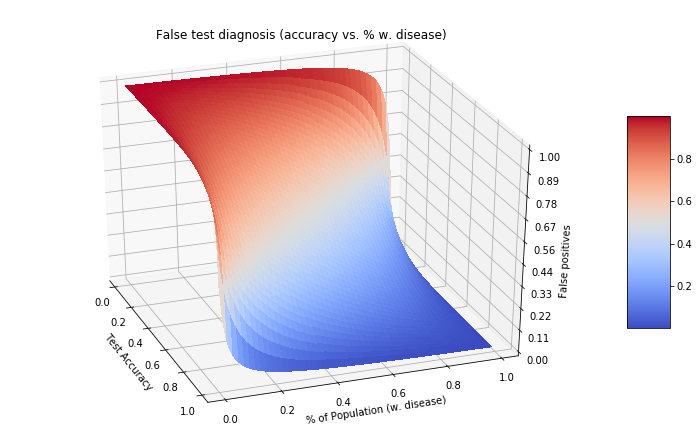

In [37]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0.01, 1, 0.01)
y = np.arange(0.01, 1, 0.01)
X, Y = np.meshgrid(x,y)
zs = np.array([falsePositives(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])        
Z = zs.reshape(X.shape)

# Plot the surface.
surf = ax.plot_surface(X,Y,Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.set_zlabel('False positives')
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

xlabel('Test Accuracy')
ylabel('% of Population (w. disease)')
title('False test diagnosis (accuracy vs. % w. disease)')

scale = 1.3
pylab.rcParams['figure.figsize'] = (10*scale, 6*scale)

ax.view_init(30, 340)
plt.draw()

## Results

This leads to interesting results:

* If the test accuracy is $100\%$, and the entire population has the disease, we have $0\%$ false positives.
* If the test accuracy is $0\%$, and nobody has the disease, we have $100\%$ false positives.
* On the edges we rise very fast; bad test accuracy + low % of affacted population gives the highest rise is false positives. This is also applicable to the other edge.